In [1]:
#interval estimation
from scipy import stats
import numpy as np
x=[10.1,10,9.8,10.5,9.7,\
  10.1,9.9,10.2,10.3,9.9]#initialize
stats.t.interval(0.95,len(x)-1,np.mean(x),stats.sem(x))

(9.8772248927975479, 10.222775107202454)

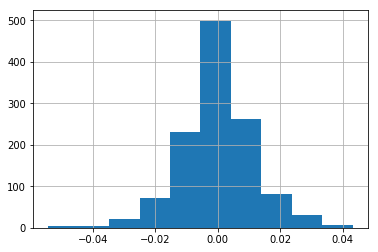

In [9]:
#analyze SHindex
#before analyzing its means, we have to estimate its distributions
import pandas as pd
SHindex=pd.read_csv('TRD_Index.csv')
Retindex=SHindex.Retindex#extract return sequence
Retindex.hist()

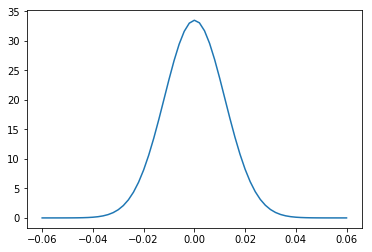

In [12]:
mu=Retindex.mean()
sigma=Retindex.std()
import matplotlib.pyplot as plt
plt.plot(np.arange(-0.06,0.062,0.002),\
        stats.norm.pdf(np.arange(-0.06,0.062,0.002),\
        mu,sigma))

In [14]:
stats.t.interval(0.95,len(Retindex)-1,np.mean(Retindex),stats.sem(Retindex))
#interval est. for mean

(-0.00061124370129507781, 0.00073188726565151367)

In [19]:
#hypothesis test
#one sample t test
TRD_Index=pd.read_table('TRD_Index.txt',sep='\t')
SHindex=TRD_Index[TRD_Index.Indexcd==1]
SHRet=SHindex.Retindex
stats.ttest_1samp(SHRet,0)
#test if the \mu==0
#if significant level==5%<p value, then we do not reject null hypothesis

Ttest_1sampResult(statistic=0.5532263041157256, pvalue=0.58021065517057679)

In [21]:
#independent samples t test
#test if two samples have the same \mu
SZindex=TRD_Index[TRD_Index.Indexcd==399106]
SZRet=SZindex.Retindex
stats.ttest_ind(SHRet,SZRet)
#do not reject

Ttest_indResult(statistic=-0.72987989529568853, pvalue=0.46553424479899419)

In [24]:
#paired sample t test
#when two samples are correlated, it's very much like one sample t test
#the same sample size is needed for both samples
stats.ttest_rel(SHRet,SZRet)
#this time, indeed reject

Ttest_relResult(statistic=-2.2428576035269878, pvalue=0.02508644157970355)